In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [83]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [84]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df = df[['text','target']]
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


# Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
le.classes_

array(['ham', 'spam'], dtype=object)

In [86]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


# Cleaning DataFrame; null and duplicated values

In [87]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [88]:
df.duplicated().sum()

np.int64(403)

In [89]:
df.drop_duplicates(keep='first', inplace=True)
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


# EDA

<b>Counting how many instances are ham and spam</b>

In [90]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<b>Representing in Pie-Chart (better vizualization)</b>

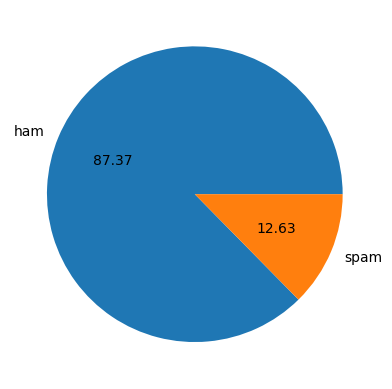

In [91]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

<b>Counting number of characters in each text</b>

In [92]:
df['num_characters'] = df['text'].apply(len)
df

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


<b>Counting number of words in each text</b>

In [93]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
print(nltk.data.find('tokenizers/punkt'))

C:\Users\Acer1\AppData\Roaming\nltk_data\tokenizers\punkt


In [95]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df


,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35
5568,Will Ì_ b going to esplanade fr home?,0,37,9
5569,"Pity, * was in mood for that. So...any other s...",0,57,15
5570,The guy did some bitching but I acted like i'd...,0,125,27


<b>Counting number of sentences in each text</b>

In [96]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


<b>Describe Method on dataframe</b>

In [97]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<b>Describe Method for ham(0) texts</b>

In [98]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<b>Describe Method for spam(1) texts</b>

In [99]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<b>Histogram for num_characters</b>

<Axes: xlabel='num_characters', ylabel='Count'>

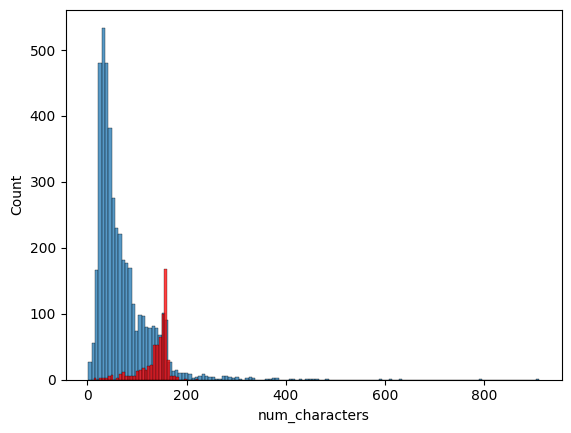

In [100]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<b>Histogram for num_characters</b>

<Axes: xlabel='num_words', ylabel='Count'>

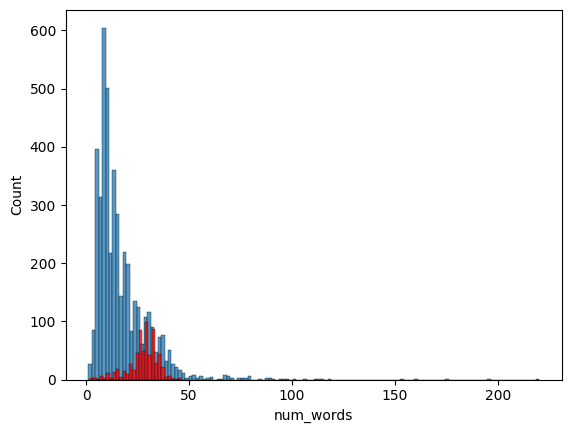

In [101]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<b>Pairplot</b>

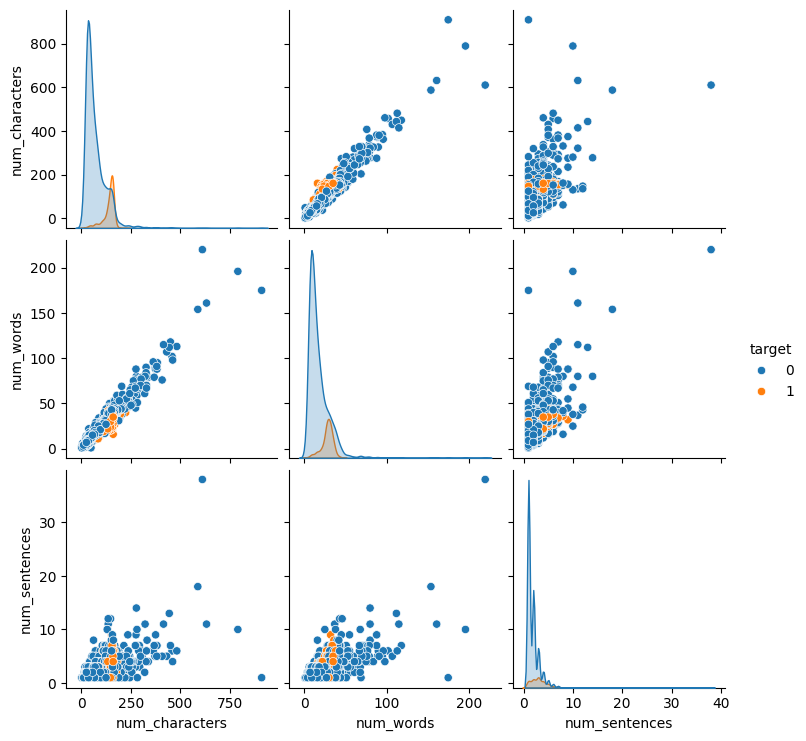

In [102]:
sns.pairplot(df,hue='target')

<b>Correlation between columns</b>

In [103]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


# Feature Engineering
- Converting text to lower case
- Tokenization : Extracting words out of the text
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [104]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
len(stopwords.words('english'))

179

In [106]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [107]:
ps = PorterStemmer()
ps.stem('stemming')

'stem'

In [108]:
nltk.word_tokenize('hello this is my home')

['hello', 'this', 'is', 'my', 'home']

In [109]:
'ejhdsf123'.isalnum()

True

Helper Function for Feature Extraction

In [110]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]

  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]

  y.clear()
  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))
      
  text = y[:]

  text = " ".join(text)
  return text

In [111]:
transform_text('Hello email spamming classification classifier  > ? _ = - ! @ # $ % ^ & * ( ) world of the zebra 200 stemming leaves')

'hello email spam classif classifi world zebra 200 stem leav'

In [112]:
df['transformed_text'] = df['text'].apply(lambda x: transform_text(x))

In [113]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [114]:
df['num_words'].sum()


np.int64(95398)

<b>WordCloud to vizualize frequent words in ham and spam emails/SMSs</b>

In [115]:
# df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
# " ".join(df[df['target'] == 1]['transformed_text'])

In [116]:
from wordcloud import WordCloud

In [117]:
wc = WordCloud(width=500,height=500, min_font_size=10, background_color='white')

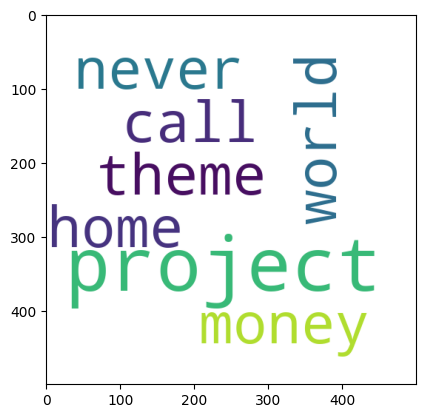

In [118]:
plt.imshow(wc.generate('world theme money this project project call never in my home'))

In [119]:
# plt.imshow(wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")))

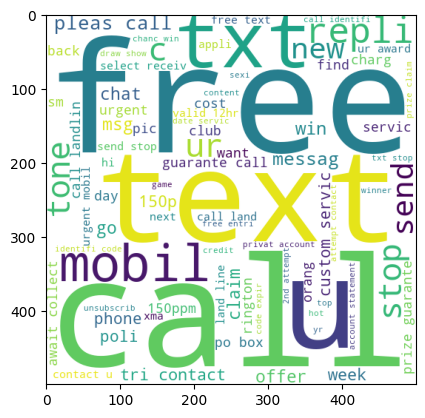

In [120]:
spam_wc = wc.generate(" ".join(df[df['target'] == 1]['transformed_text']))
plt.imshow(spam_wc)

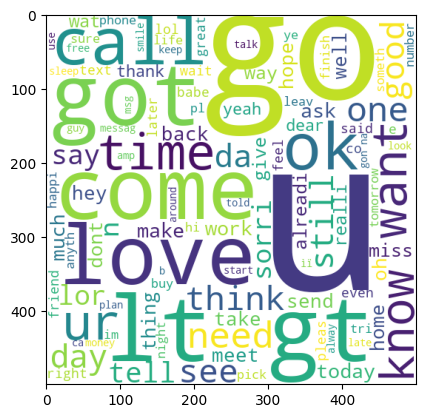

In [121]:
ham_wc = wc.generate(" ".join(df[df['target'] == 0]['transformed_text']))
plt.imshow(ham_wc)

<b>Counting most frequent words in ham and spam emails</b>

In [122]:
spam_corpus = " ".join(df[df['target'] == 1]['transformed_text'].values)
spam_corpus = spam_corpus.split()   # returns a list of the words separated by comma

In [123]:
ham_corpus = " ".join(df[df['target'] == 0]['transformed_text'].values)
ham_corpus = ham_corpus.split()

In [124]:
from collections import Counter
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_corpus_df.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


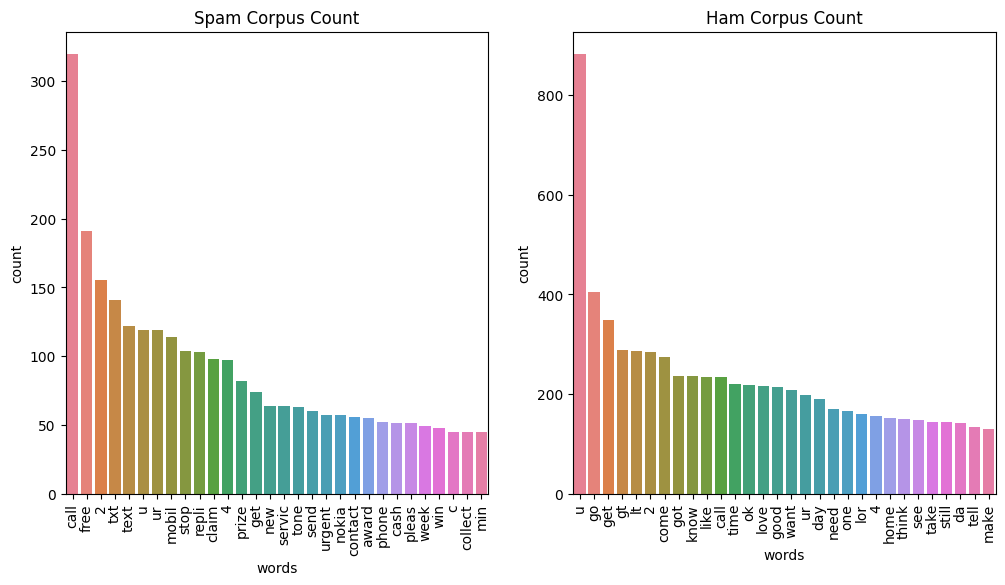

In [125]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,6), ncols=2)

sns.barplot(x=spam_corpus_df[0], y=spam_corpus_df[1],hue=spam_corpus_df[0], ax=ax1)
ax1.set_title('Spam Corpus Count')
ax1.set_xlabel('words')
ax1.set_ylabel('count')
ax1.tick_params(axis='x',rotation=90)

sns.barplot(x=ham_corpus_df[0], y=ham_corpus_df[1], hue=ham_corpus_df[0], ax=ax2)
ax2.set_title('Ham Corpus Count')
ax2.set_xlabel('words')
ax2.set_ylabel('count')
ax2.tick_params(axis='x',rotation=90)
plt.show()

# Model Building

<b>Text Vectorization & Extracting X,y</b>

In [126]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [127]:
# cv = CountVectorizer()
# X = cv.fit_transform(df['transformed_text']).toarray()
# X   

In [128]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
y = df['target'].values

In [130]:
# 5168 emails and 6708 words
print(X.shape)
print(y.shape)

(5169, 3000)
(5169,)


<b>Train Test Split</b>

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

<b>Naive Bayes</b>

In [132]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [133]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [134]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8626692456479691
0.5062761506276151
[[771 118]
 [ 24 121]]


In [135]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9729206963249516
0.9915966386554622
[[888   1]
 [ 27 118]]


In [136]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9729206963249516
0.9606299212598425
[[884   5]
 [ 23 122]]


# Pickling

In [137]:
import pickle
pickle.dump(tfidf, open('tfidf_vectorizer.pkl','wb'))
pickle.dump(mnb, open('multinomial_nb.pkl','wb'))